In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from adjustbeta import adjustbeta
from tsne import tsne,pca

In [2]:
print("Run Y = tsne(X, low_dims, perplexity) to perform t-SNE on your dataset.")
print("Running example on 2,500 MNIST digits...")
X = np.loadtxt('mnist2500_X.txt')
print("X shape:", X.shape)
X = pca(X, 50)
labels = np.loadtxt('mnist2500_labels.txt')
print("labels shape:", labels.shape)
# simulation tiem
T = 1000
Y, kl_div = tsne(X , perplexity = 30.0, eta = 500 , T = T)
Y = Y.cpu().numpy()
kl_div = kl_div.cpu().numpy()

Run Y = tsne(X, low_dims, perplexity) to perform t-SNE on your dataset.
Running example on 2,500 MNIST digits...
X shape: (2500, 784)
labels shape: (2500,)
CUDA is available. Defaulting to NVIDIA GeForce RTX 4060 Laptop GPU (cuda:0).
Selected device: cuda:0 (NVIDIA GeForce RTX 4060 Laptop GPU)


100%|██████████| 1000/1000 [00:05<00:00, 172.76it/s]


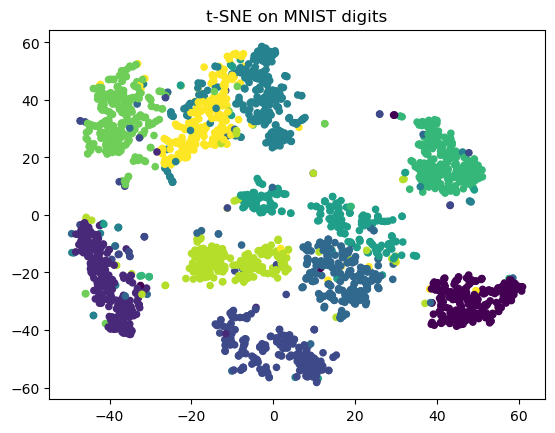

In [7]:
plt.scatter(Y[:, 0], Y[:, 1], 20, labels)
plt.title("t-SNE on MNIST digits")
plt.savefig("mnist_tsne3.png")

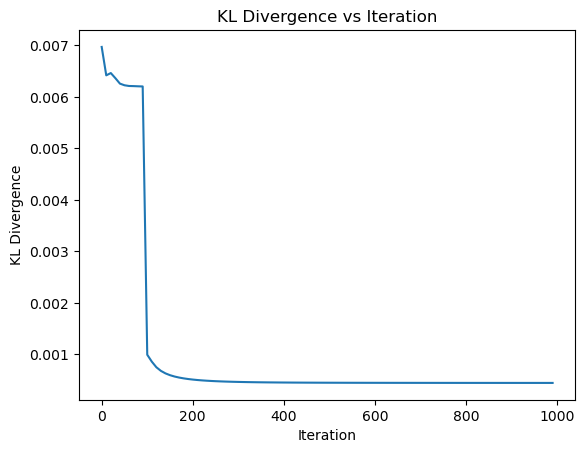

In [8]:
plt.figure()
plt.plot(np.arange(0,T,10),kl_div)
plt.xlabel("Iteration")
plt.ylabel("KL Divergence")
plt.title("KL Divergence vs Iteration")
plt.savefig("mnist_kl_div.png")